## 6.4 Adding Interactivity to plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


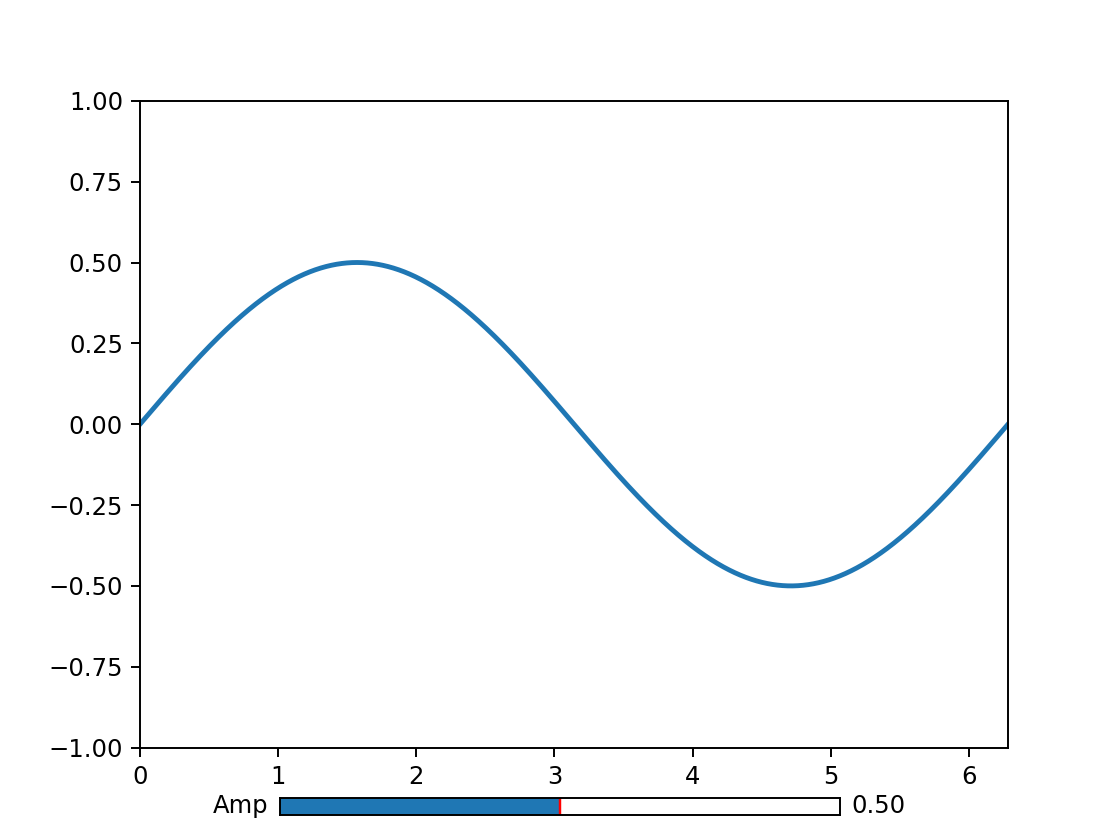

In [2]:
%matplotlib notebook
TWOPI = 2*np.pi

fig, ax = plt.subplots()

t = np.arange(0.0, TWOPI, 0.001)
initial_amp = .5
s = initial_amp*np.sin(t)
l, = plt.plot(t, s, lw=2)

ax = plt.axis([0, TWOPI, -1,1])

axamp = plt.axes([0.25, .03, 0.50, 0.02])
#Slider
samp = Slider(axamp, 'Amp', 0, 1, valinit=initial_amp)

def update(val):
    # amp is the current value of the slider
    amp = samp.val
    # update curve
    l.set_ydata(amp*np.sin(t))
    # redraw canvas while idle
    fig.canvas.draw_idle()
    
# Call update function on slider value change
samp.on_changed(update)

plt.show()

## 6.5 Creating Visulization the update interactively with data

In [3]:
def data_gen():
    while True:
        yield np.random.rand(10)

<IPython.core.display.Javascript object>


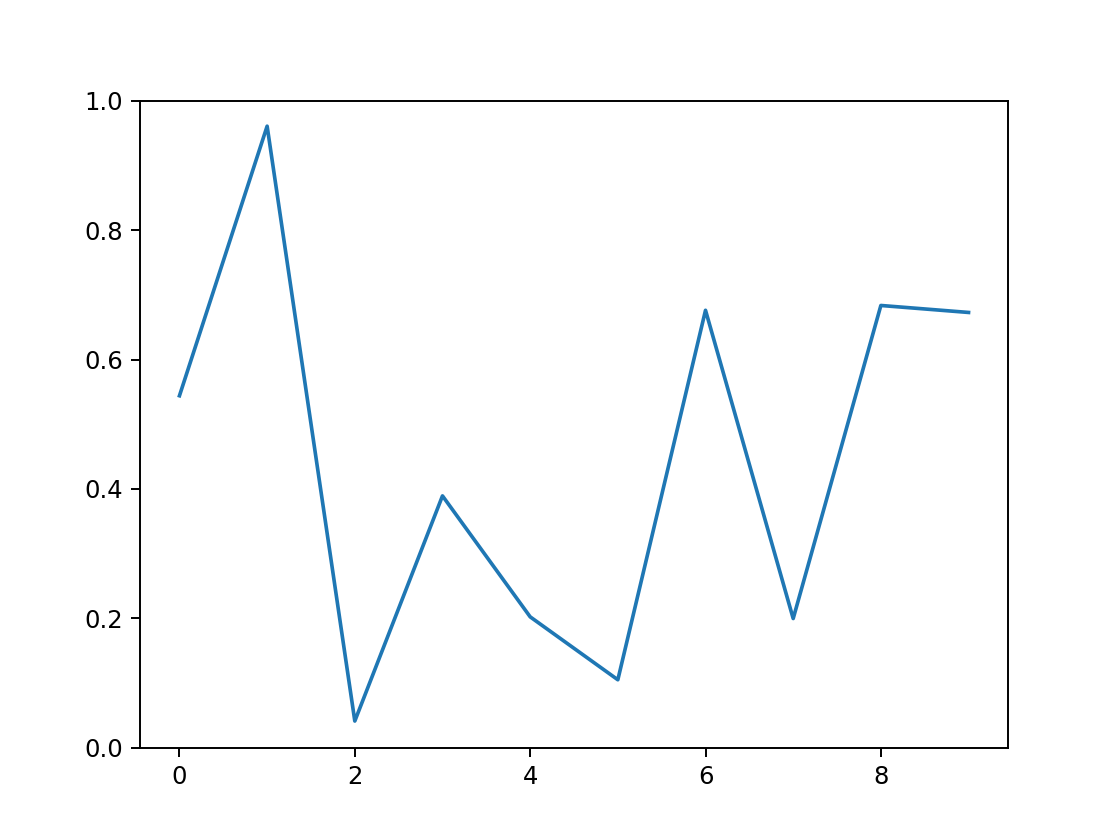

Line2D(_line0)


In [4]:
fig, ax = plt.subplots()
line, = ax.plot(np.random.rand(10))
print(line)
# The line(,) is important here. You are creating a tuple of random numbers
ax.set_ylim(0, 1)

def update(data):
    line.set_ydata(data)
    return line,

ani = FuncAnimation(fig, update, data_gen, interval=100)
plt.show()

## 7.1 Change the size of the figure

In [5]:
data = pd.read_csv('vgsales.csv')

In [6]:
genre = data[[ "Genre", 'NA_Sales','EU_Sales','JP_Sales']].groupby(['Genre'], as_index=False).sum()

In [7]:
%matplotlib inline

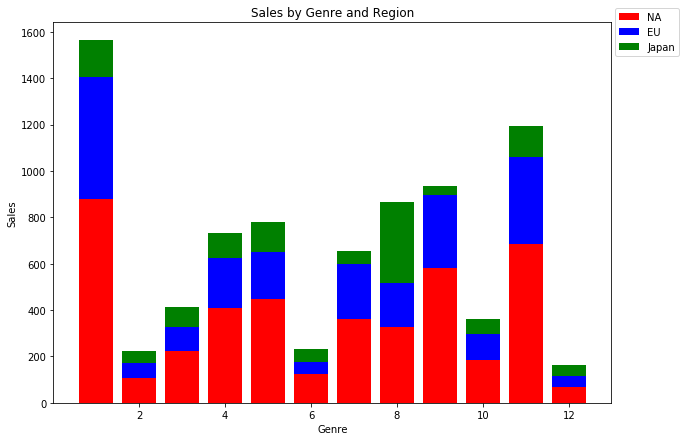

In [8]:
f, ax = plt.subplots(1, figsize=(10,7))

bar_1 = [i+1 for i in range(len(genre['NA_Sales']))]
ax.bar(bar_1, genre['NA_Sales'], label='NA', color='red')
ax.bar(bar_1, genre['EU_Sales'], bottom=genre['NA_Sales'], label='EU', color='blue')
ax.bar(bar_1, genre['JP_Sales'], bottom=[i+j for i,j in zip(genre['NA_Sales'],genre['EU_Sales'])], label='Japan', color='green')

ax.set_title('Sales by Genre and Region')
ax.set_xlabel('Genre')
ax.set_ylabel('Sales')

ax.legend(bbox_to_anchor=(1.13, 1.05))

plt.show()